<a href="https://colab.research.google.com/github/iagoit/data_projects/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://img.freepik.com/free-vector/cyber-thief_1214-385.jpg?size=626&ext=jpg&ga=GA1.2.1204701144.1628845950" width="50%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://img.freepik.com/free-vector/thief-stealing-credit-card-wallet-criminal-steals-man-wallet-concept-fraud-fraud-fraud-with-money-vector_174639-2560.jpg?size=626&ext=jpg&ga=GA1.2.1204701144.1628845950" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

Nosso alvo será a coluna *Class*, sendo:

* **0 para atividades legitimas**
* **1 para atividades fraudulentas**

In [21]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

# sklearn para modelos de ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

# pacote para balanceamento
from imblearn.under_sampling import RandomUnderSampler

# ignorar os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [2]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

## Análise Exploratória

Agora com os dados devidamente importados é hora de analisa-lós e ver se existe a necessidade de uma limpeza ou tratamento para construirmos nosso modelo de ML.

In [3]:
# primeiras entradas do dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Vejamos a quantidade de linhas e colunas do dataset.

In [4]:
# quantidade de linhas e colunas
print('Qtd Linhas:  ', df.shape[0])
print('Qtd Colunas: ', df.shape[1])

Qtd Linhas:   284807
Qtd Colunas:  31


Verificando abaixo o resumo estatístico, por meio do método `describe()`, podemos confirmar que as variáveis relativas aos componentes principais (transformação PCA) não têm nenhuma discrepância aparente, bem como a coluna `Time`.

Em relação à variável `Amount`, nota-se que o valor médio de transações (considerando ambas as classes) é 88.34, mediana igual a 22.00 e desvio padrão de 250.12. Atingindo o valor máximo de 25691.16, a maioria das transações financeiras é composta em sua maioria por quantias menores - como esperado.

In [5]:
# informações estatisticas
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Vejamos se existem valores ausentes no dataset.

In [6]:
# verificar se existe valores ausentes
print('Qtd de valores ausentes: ', df.isnull().sum().max())

Qtd de valores ausentes:  0


Agora que já verificamos que não há valores ausentes no dataset, iremos verificar a quantidade de transações legítimas e a quantidade de transações fraudulentas.

In [7]:
# número de transações legítimas/fraudulentas
print(df.Class.value_counts())

# % de transações fraudulentas em relação ao dataset
print("\nFraudes representam {:.2f}% do dataset.".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.17% do dataset.


O número de transações fraudulentas representam 0.17% do dataset, com isso identificamos que a variável `Class` está desbalanceada.

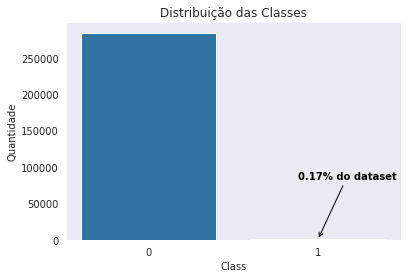

In [8]:
# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
el = Ellipse((2, -1), 0.5, 0.5)
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
ax.set_ylabel('Quantidade')
qtd_fraudulentas = round((df['Class'].value_counts()[1] / df.shape[0]) * 100, 2)
ax.annotate(str(qtd_fraudulentas) + "% do dataset", 
                xy = (1, df['Class'].value_counts()[1]), 
                xytext = (-20,60), 
                color = "#000000",
                weight = 'bold', 
                textcoords = 'offset points',
                arrowprops = dict(arrowstyle="->", color = '#000000'))
plt.plot()
plt.savefig('graph1.png')

Já sabemos que nossa variável `Class` está desbalanceada e isso vai atrapalhar o desempenho do modelo, então precisaremos balancear essa variável, mas esse processo de balanceamento será realizada na **Preparação de dados**.

Agora vamos examinar a nossa variável `Time`.

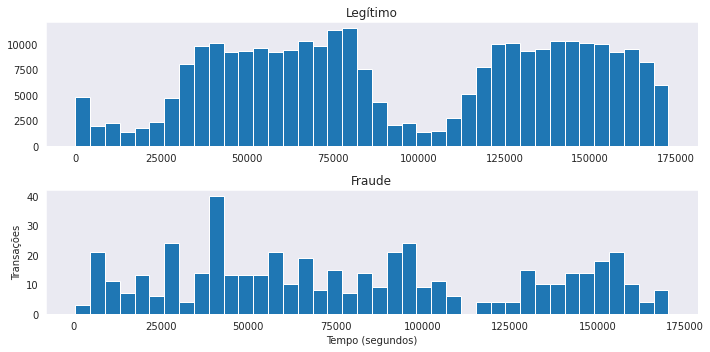

In [9]:
# histograma de transações em relação ao 'Time'
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,5))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Legítimo')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraude')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()
plt.savefig('graph2.png')

Em relação a variável `Time`, podemos identificar que as transções legítimas carm drasticamente durante a marca de 85.000 e voltam a subir na marca de 115.000. Por outro lado as transações fraudulentas aumentam bastantem durente a noite. Possivelmente por ter menos segurança.

Podemos fazer a mesma analise para `Amount`.

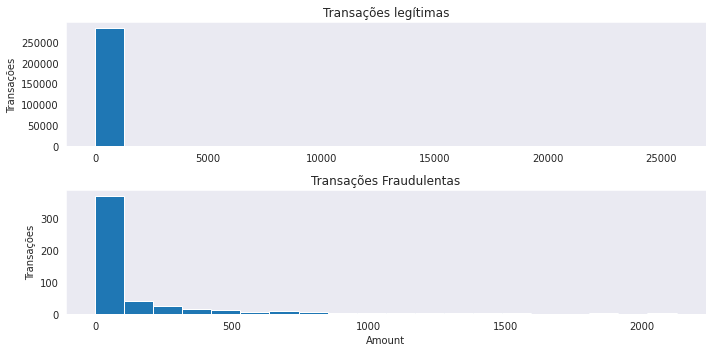

In [10]:
# histograma de transações em relação ao 'Amout'
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

num_bins = 20

ax[0].hist(df.Amount[df.Class == 0], bins=num_bins)
ax[0].set_title('Transações legítimas')
ax[0].set_ylabel('Transações')

ax[1].hist(df.Amount[df.Class == 1], bins=num_bins)
ax[1].set_title('Transações Fraudulentas')
ax[1].set_ylabel('Transações')
ax[1].set_xlabel('Amount')

plt.tight_layout()
plt.savefig('graph3.png')

Feita essa analise podemos identificar que não tem insights muitos relevantes em relação ao `Amount`. A maiores das transações eram de quantias pequenas.

Agora iremos verificar a presença de *outliers*.

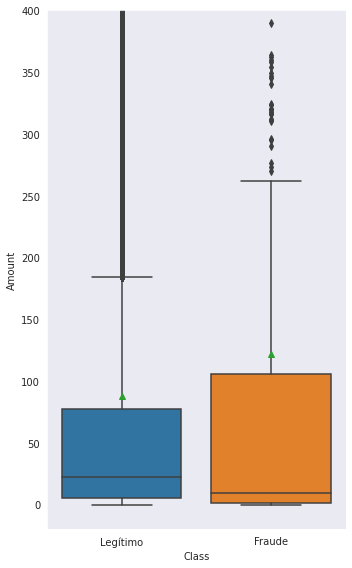

In [11]:
# plotar boxplot
fig, ax = plt.subplots(figsize=(5,8), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Legítimo', 'Fraude'])

plt.tight_layout()
plt.savefig('graph4.png')

Existe outliers em ambos tipos de transações, porem remove-los afetaria o desempenho do modelo, já que nosso objetivo é determinar se uma transação é legítimas ou fraudulenta.

Agora vejamos como está nossa *matriz de correlação*.

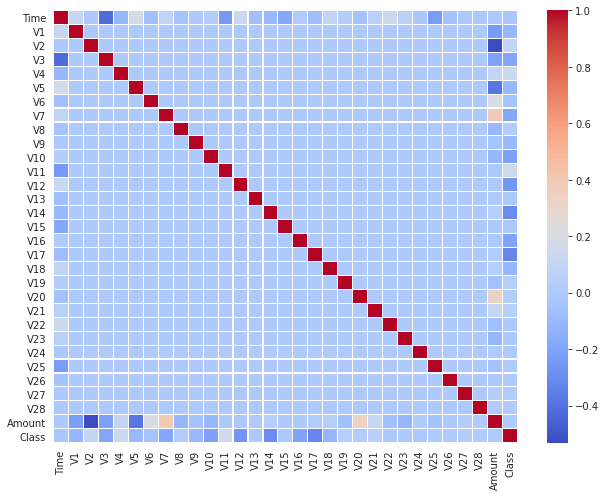

In [12]:
# plotar a matriz de correlação
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax)
plt.tight_layout()
plt.savefig('graph5.png')

Agora já identificamos que as variáveis não possuem uma relação muito forte entre elas.

## Preparando os Dados

Antes de desenvolver o modelo de machine learning é necessário realizar algumas etapas de preparção dos dados, como:
* Padronizar as *features* `Time` e `Amount` com `StrandardScaler`.
* Dividir o *dataset* entre treino e teste.
* Balancear os dados para evitar a baixa performace.

Essa é uma etapa muito importante para que possamos ter o melhor resultado do modelo.

In [13]:
# padronizar as colunas Time e Amount
df_clean = df.copy()

# normalização da variável
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Agora que nossas *features* `Time` e `Amount` estão padronizanas é hora de dividir nossos dados entre treino e teste.

In [14]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

Como já havíamos visto os nossos dados estão desbalanceados e para que possamos corrigir este problema iremos utilizar o `RandomUnderSampler`.

1    369
0    369
dtype: int64


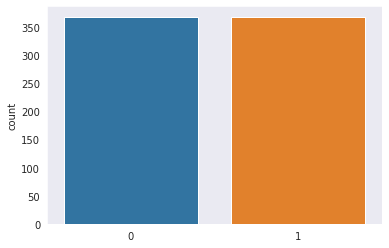

In [15]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);
plt.savefig('graph6.png')

Agora já temos nossos dados balanceados com 369 entradas em cada um.

Com os dados balanceados iremos mostrar a matriz de correlação para que possamos identificar as variáveis que estão mais relacionadas as outras.

Como isso podemos comparar quando nossos dados estavam desbalanceados com o atual estado balanceado deles.

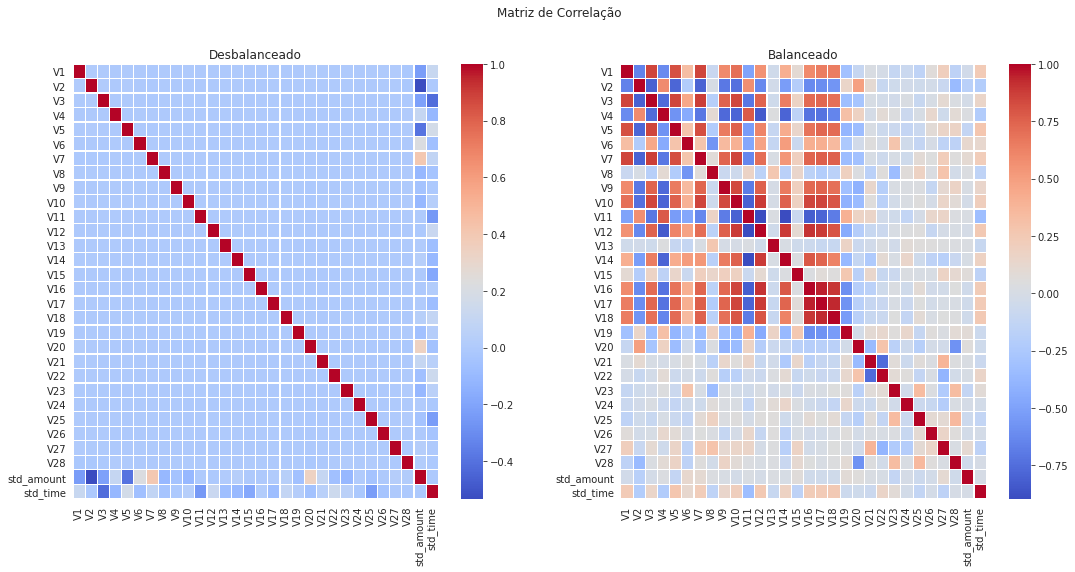

<Figure size 432x288 with 0 Axes>

In [16]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns, linewidths=.1, 
            cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, 
            yticklabels=corr.columns, linewidths=.1, 
            cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()
plt.savefig('graph7.png')

## Modelo de Machine Learning

Neste caso iremos utilizar dois modelo de classificação:
* `Regressão Logística`
* `Árvore de Decisão`

In [17]:
# modelo de regressão logística
model_log = LogisticRegression()

model_log.fit(X_rus, y_rus)

y_pred_log = model_log.predict(X_test)

In [18]:
# modelo árvore de decisão
model_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy")

model_tree.fit(X_rus, y_rus)

y_pred_tree = model_tree.predict(X_test)

## Avaliar o desempenho do modelo

Vamos avaliar qual modelo consegue atender o objetivo proposto, levando em consideração as seguintes métricas:
* **Precision**: Capacidade prever um rótulo corretamente, por exemplo, o percentual de fraudes previstas corretamente.
* **Recall**: Capacidade de prever um rótulo dentro do universo daquela variável, por exemplo, o percentual de previsão de fraude em relação as fraudes ocorridas;
* **Acurracy**: A capacidade de prever todos rótulos corretamente.

Iremos utilizar `classification_report` e `roc_auc_score` para ver os resultados.

In [19]:
# classification report
print("\n                     * Regressão Logística *                     \n")
print(classification_report(y_test, y_pred_log))

# ROC AUC score
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_log)))

print("------------------------------------------------------------------")

# classification report
print("\n                     * Árvore de Decisão *                       \n")
print(classification_report(y_test, y_pred_tree))

# ROC AUC score
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_tree)))


                     * Regressão Logística *                     

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.04      0.93      0.07       123

    accuracy                           0.96     71202
   macro avg       0.52      0.94      0.53     71202
weighted avg       1.00      0.96      0.98     71202

AUC: 0.9436

------------------------------------------------------------------

                     * Árvore de Decisão *                       

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.05      0.85      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.91      0.54     71202
weighted avg       1.00      0.97      0.98     71202

AUC: 0.9081



Agora iremos plotar a matriz confusão para ambos os modelos com o objetivo de avaliarmos a quantidade de previsões versus ocorrências para cada classe de transação.

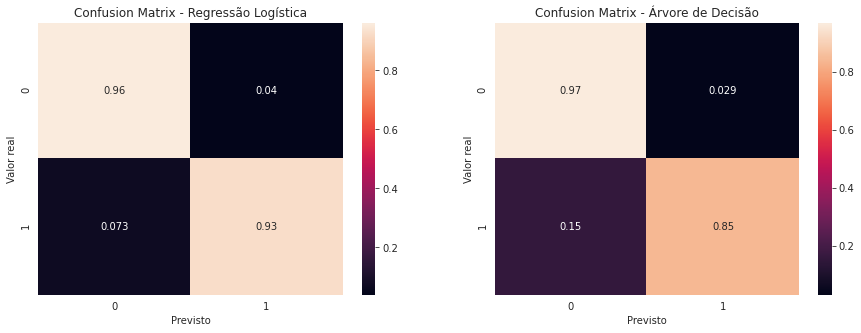

<Figure size 432x288 with 0 Axes>

In [20]:
# confusion matrix
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

sns.heatmap(confusion_matrix(y_test, y_pred_log, normalize='true'), annot=True, ax=ax[0])

ax[0].set_title("Confusion Matrix - Regressão Logística")
ax[0].set_ylabel("Valor real")
ax[0].set_xlabel("Previsto")

sns.heatmap(confusion_matrix(y_test, y_pred_tree, normalize='true'), annot=True, ax=ax[1])

ax[1].set_title("Confusion Matrix - Árvore de Decisão")
ax[1].set_ylabel("Valor real")
ax[1].set_xlabel("Previsto")

plt.show()
plt.savefig('graph8.png')

## Conclusão

* Tanto o modelo de `Regressão Logística` quanto o modelo de `Árvore de Decisão`, tiverem ótimos resultados no quesito identificar fraudes com cartão de crédito. Ambos os modelo mostraram resultados acima de 90%, como mostra a *accuracy, precision e ROC AUC score*. 
* Embora ambos tenham desempenhado ótimos resultados a `Regressão Logística` ainda foi superior. 
* É importante ressaltar o quão importante foi a fase de preparação dos dados. Se tivessemos feito essa fase, os resultados dos modelos teriam sido afetados.